<a href="https://colab.research.google.com/github/johnallard513/EDA/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns



### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# edited to import CSV from google drive
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
shape = df.shape
print(shape)

(1898, 9)


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()
# summed for readability

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are 1898 rows and 9 columns, and no missing values. Order_id, customer_id, food_preperation_time, and order_delivery_time are int64 values. Restuarant_name, cuisine_type, day_of_the_week, and rating are object values. Cost_of_the_order is float64.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
min = df["food_preparation_time"].min()

avg = df["food_preparation_time"].mean()

#Converted from float to minutes and seconds
Avg_minutes = int(avg)
Avg_seconds = int((avg - minutes) * 60)

max = df["food_preparation_time"].max()

print("Minumum prep time is:", min, "minutes")
print("Average prep time is:", Avg_minutes, "minutes", Avg_seconds, "seconds")
print("Maximum prep time is:", max, "minutes")

Minumum prep time is: 20 minutes
Average prep time is: 27 minutes 22 seconds
Maximum prep time is: 35 minutes


#### Observations:

Minimum prep time is 20 minutes, max is 35 minutes, and average is 27 minutes 22 seconds.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df["rating"].value_counts()['Not given']

736

#### Observations: The total number of unrated orders is 736.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

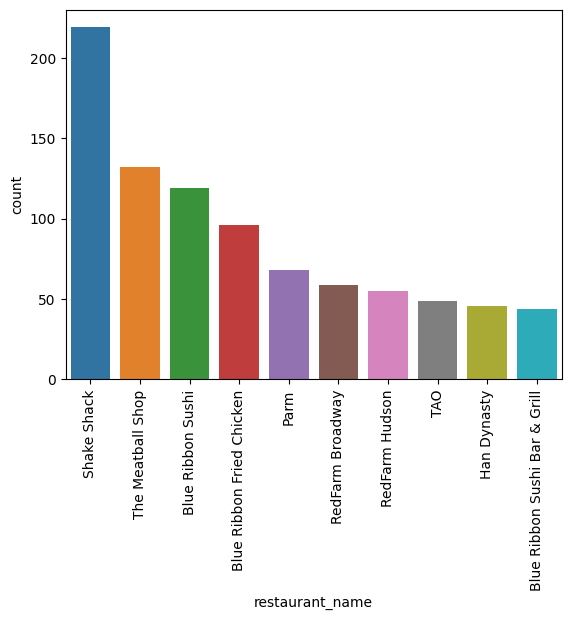

In [ ]:
sns.countplot(data=df, x="restaurant_name", order=pd.value_counts(df['restaurant_name']).iloc[:10].index) # iloc used to reduce x axis to the 10 most popular restaurants
plt.xticks(rotation=90) # plt.xticks used to rotate x axis variables for readability
plt.show()


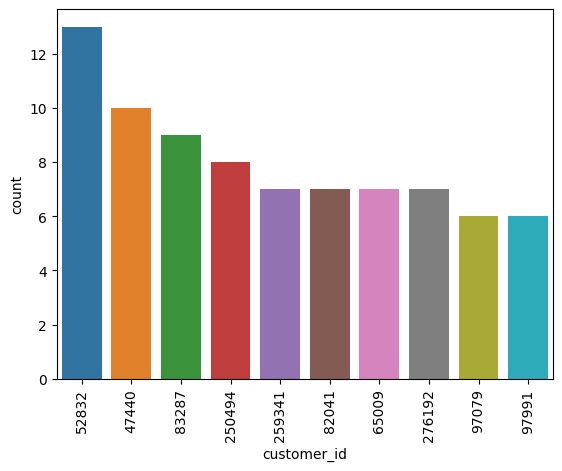

In [ ]:
sns.countplot(data=df, x="customer_id", order=pd.value_counts(df['customer_id']).iloc[:10].index)  # iloc used to reduce x axis to the 10 most popular restaurants
plt.xticks(rotation=90) # plt.xticks used to rotate x axis variables for readability
plt.show()

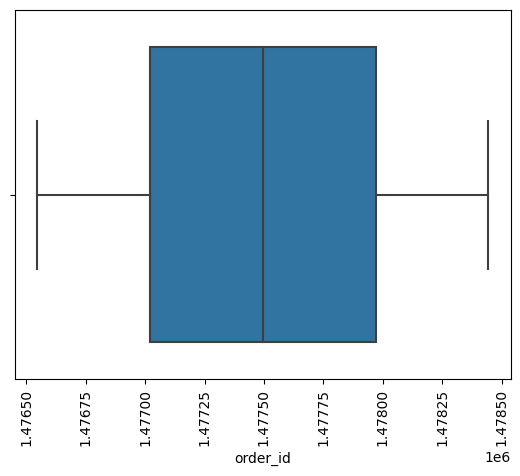

In [ ]:
# Boxplot used to show the full range of order ID's
ax = sns.boxplot(data=df, x="order_id")
plt.xticks(rotation=90)
plt.show()

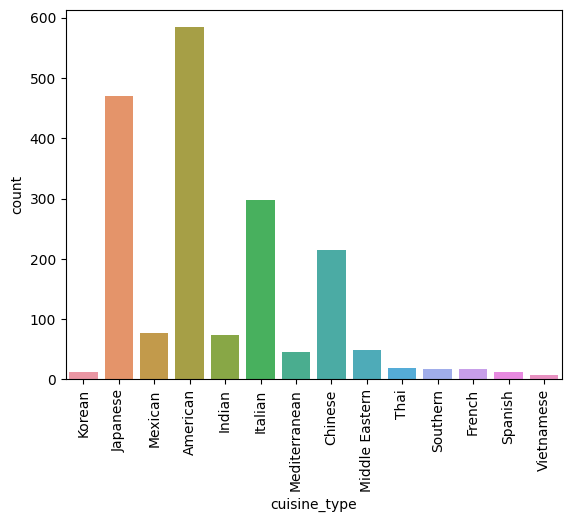

In [ ]:
# Countplot used to show the total order counts by cuisine type
sns.countplot(data=df, x="cuisine_type")
plt.xticks(rotation=90)
plt.show()

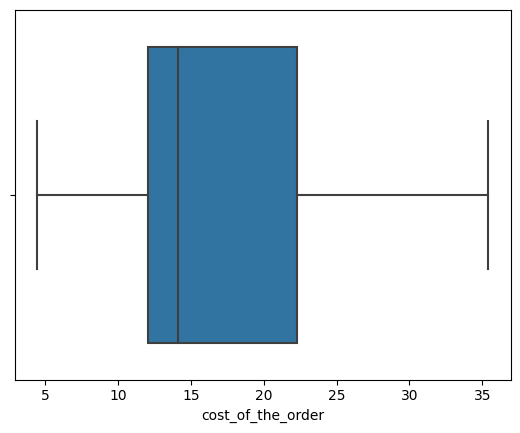

In [ ]:
# Boxplot used to show the full range of order costs as well as Q1, mean, and Q3
sns.boxplot(data=df, x="cost_of_the_order")
plt.show()

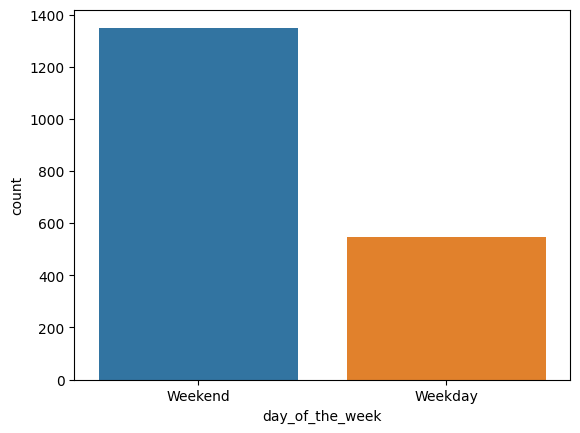

In [ ]:
#Countplot to show weekend orders vs weekday orders
sns.countplot(data=df, x="day_of_the_week")
plt.show()

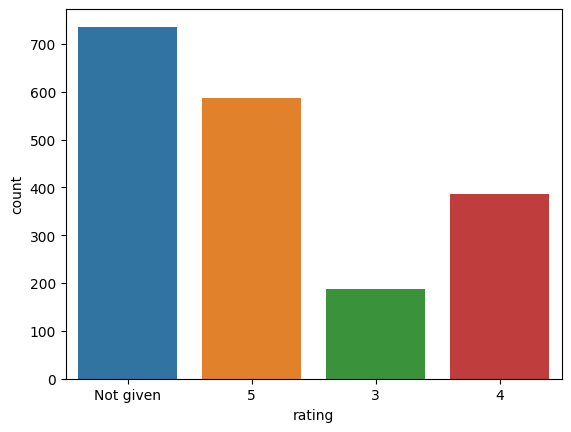

In [ ]:
# Countplot used to show ratio of order ratings
sns.countplot(data=df, x="rating")
plt.show()

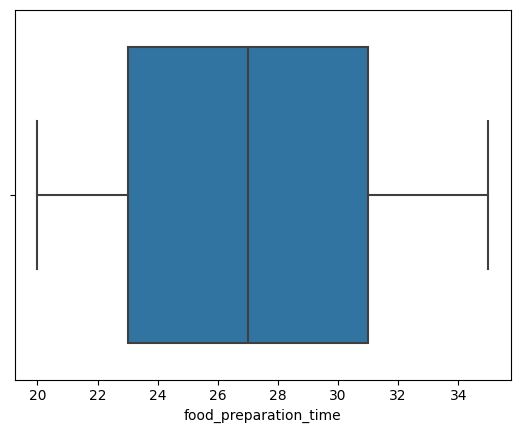

In [ ]:
# Boxplot used to show the full range of prep times as well as Q1, mean, and Q3
sns.boxplot(data=df, x="food_preparation_time")
plt.show()

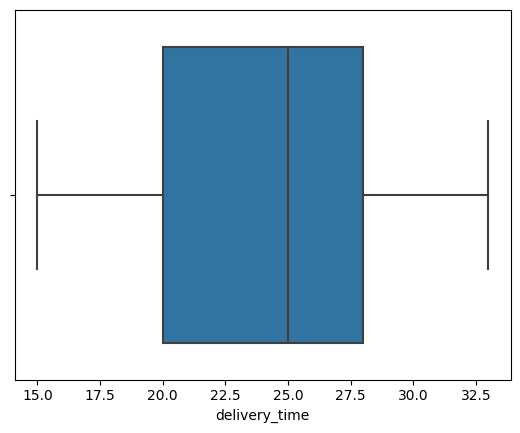

In [ ]:
# Boxplot used to show the full range of delivery times as well as Q1, mean, and Q3
sns.boxplot(data=df, x="delivery_time")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

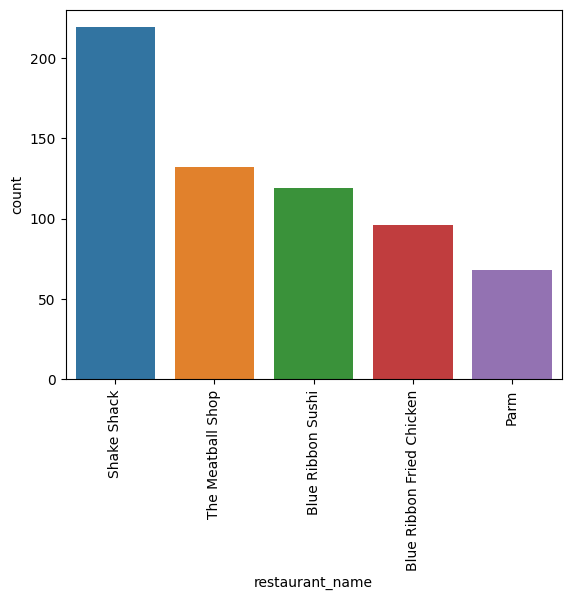

In [ ]:
# Write the code here

sns.countplot(data=df, x="restaurant_name", order=pd.value_counts(df['restaurant_name']).iloc[:5].index) # iloc to index the top 5 most common restaurants
plt.xticks(rotation=90)
plt.show()

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

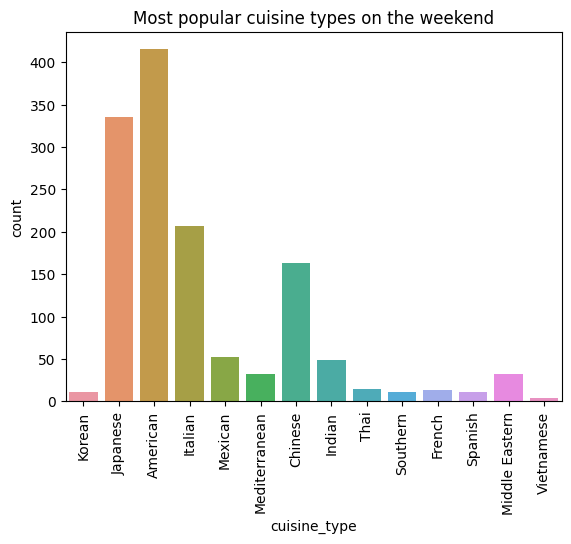

In [ ]:
# Write the code here

sns.countplot(x='cuisine_type', data=df[df['day_of_the_week'] == "Weekend"]) # Only count columns with the "Weekend" value in the 'day_of_the_week' column
plt.title(f"Most popular cuisine types on the weekend")
plt.xticks(rotation=90)
plt.show()



```
# This is formatted as code
```

#### Observations: American is the most popular cuisine type on the weekend.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

above_20_count = len(df[df["cost_of_the_order"] > 20])
total_values = len(df["cost_of_the_order"])
percentage_above_20 = (above_20_count / total_values) * 100

print(f"The percentage of orders costing above $20 is: {percentage_above_20:.2f}%")

The percentage of orders costing above $20 is: 29.24%


#### Observations: Just under 30% of orders (29.24) are over $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

mean_delivery_time = df["delivery_time"].mean().round(2) #Rounded for readability


#Converted from float to minutes and seconds
minutes = int(mean_delivery_time)
seconds = int((mean_delivery_time - minutes) * 60)

print(f"{minutes} minutes and {seconds} seconds")


24 minutes and 9 seconds


#### Observations:
The average order delivery time is 24 minutes and 9 seconds.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The 3 most frequent customers are 52832, 47440, 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


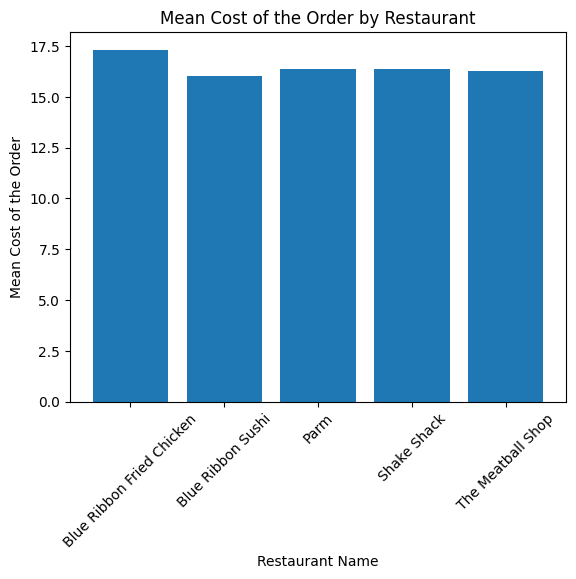

In [ ]:

# Filter restaurant list to the 5 most common restaurants
value_counts = df['restaurant_name'].value_counts() # Create a value count list for the restaurant_name column
top_values = value_counts.head(5) # Filter the list to the 5 most common restaurants
filtered_df = df[df['restaurant_name'].isin(top_values.index)] # Create a new dataframe containing only the 5 most popular restaurants

# Mean cost of order by restaurant
mean_values = filtered_df.groupby('restaurant_name')['cost_of_the_order'].mean()

# Create a bar plot
plt.bar(mean_values.index, mean_values.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Mean Cost of the Order')
plt.title('Mean Cost of the order at the 5 most visited restaurants')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

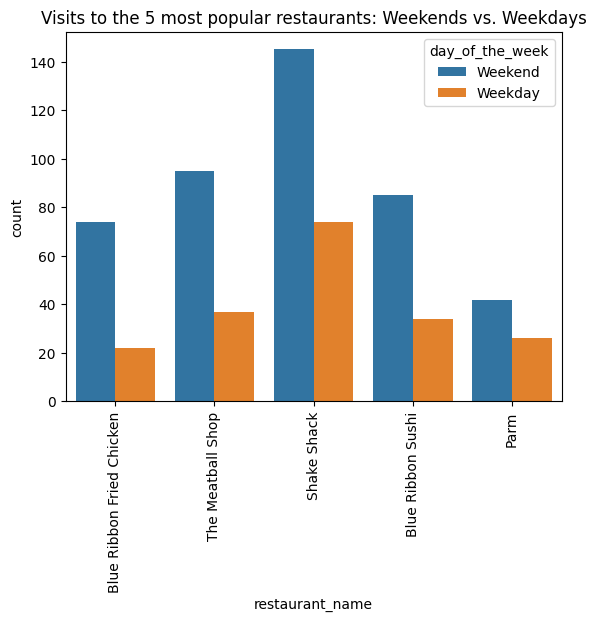

In [ ]:
#Filter restaurant list to the 5 most common restaurants
value_counts = df['restaurant_name'].value_counts() # Create a value count list for the restaurant_name column
top_values = value_counts.head(5) # Filter the list to the 5 most common restaurants
filtered_df = df[df['restaurant_name'].isin(top_values.index)] # Create a new dataframe containing only the 5 most popular restaurants

#Plot total value counts for each restaurant with the hue set to 'day_of_the_week'
sns.countplot(data=filtered_df, x="restaurant_name", hue="day_of_the_week")
plt.title("Visits to the 5 most popular restaurants: Weekends vs. Weekdays")
plt.xticks(rotation=90)
plt.show()

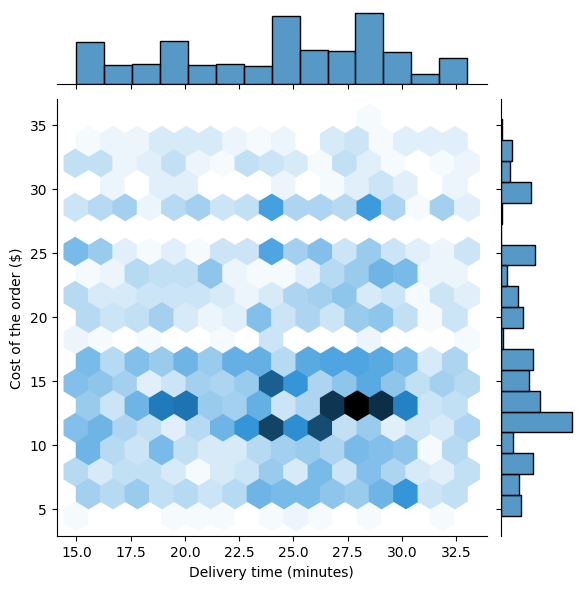

In [ ]:

# Delivery time vs. cost of order plotted as a jointplot to show both individual variables as well as their correlation
sns.jointplot(data=df, x = "delivery_time", y = "cost_of_the_order", kind="hex") # Kind changed to hexagrams for readability
plt.xlabel("Delivery time (minutes)")
plt.ylabel("Cost of the order ($)")
plt.show()

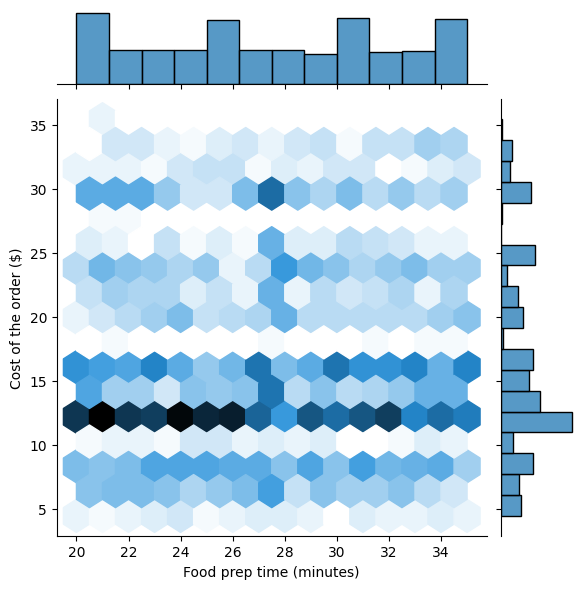

In [ ]:
# Food prep time vs. cost of order plotted as a jointplot to show both individual variables as well as their correlation
sns.jointplot(data=df, x = "food_preparation_time", y = "cost_of_the_order", kind="hex") # Kind changed to hexagrams for readability
plt.xlabel("Food prep time (minutes)")
plt.ylabel("Cost of the order ($)")
plt.show()

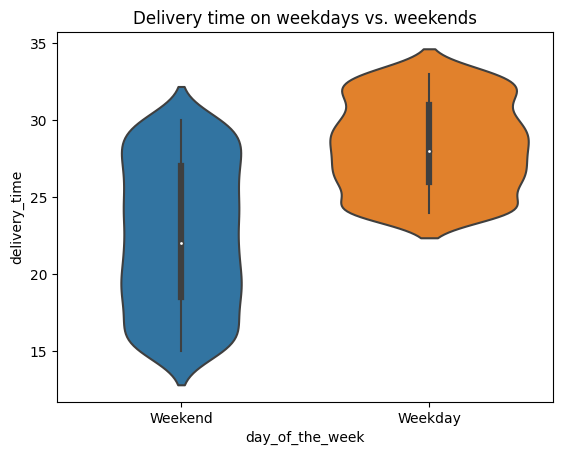

In [ ]:
# Delivery time vs day of the week plotted as a violinplot to show median and IQR, as well as overall distribution
sns.violinplot(data=df, x = "day_of_the_week", y = "food_preparation_time")
plt.xlabel("Food prep time (minutes)")
plt.ylabel("Cost of the order ($)")
plt.show()

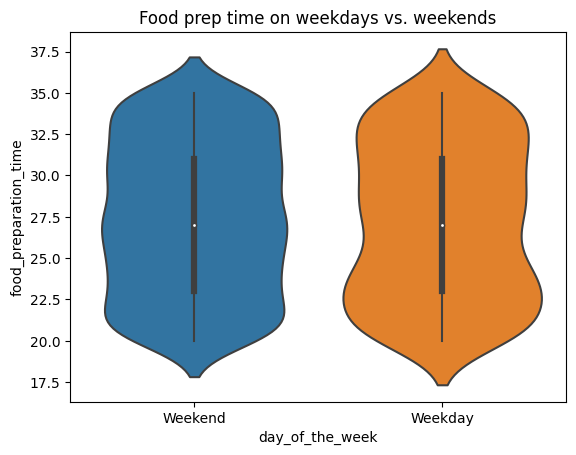

In [ ]:
# Food preparation time vs day of the week plotted as a violinplot to show median and IQR, as well as overall distribution
sns.violinplot(data=df, x = "day_of_the_week", y = "food_preparation_time")
plt.title("Food prep time on weekdays vs. weekends")
plt.show()

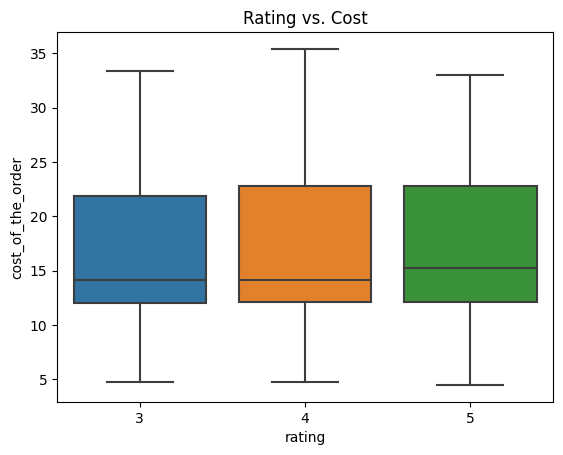

In [ ]:
#Rating vs cost plotted as boxplots to show if there's a correlation between customer satisfaction rating and cost

# Remove all rows with 'Not given' in the rating column
copied_df = df.copy()
copied_df = copied_df[copied_df['rating'] != 'Not given']

# Convert ratings to integer
copied_df['rating'] = copied_df['rating'].astype(int)


sns.boxplot(data = copied_df, x = "rating", y = "cost_of_the_order")
plt.title("Rating vs. Cost")
plt.show()

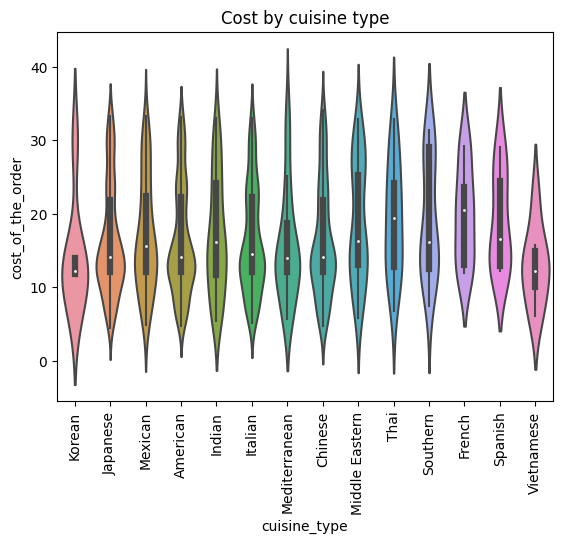

In [ ]:
# Cost of order organized by cuisine type
sns.violinplot(data=df, x = "cuisine_type", y = "cost_of_the_order")
plt.title("Cost by cuisine type")
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:

#Remove all rows with ratings of 'Not given' and restaurants with fewer than 50 ratings
copied_df = df.copy()
copied_df = copied_df[copied_df['rating'] != 'Not given'] # Remove rows with 'Not given' in 'rating' column
grouped_df = copied_df.groupby('restaurant_name') # Group by restaurant name
value_counts = grouped_df['restaurant_name'].transform('count') # Get total value counts by restaurant
mask = value_counts >= 50 #create a mask for all restaurants with more than 50 ratings
filtered_df = copied_df[mask]# Filter the original DataFrame based on the mask

#Find the mean of each restaurant's rating
mean_for_BRFC = filtered_df[filtered_df['restaurant_name'] == 'Blue Ribbon Fried Chicken']['rating'].astype(float).mean().round(1)
mean_for_SS = filtered_df[filtered_df['restaurant_name'] == 'Shake Shack']['rating'].astype(float).mean().round(1)
mean_for_BRS = filtered_df[filtered_df['restaurant_name'] == 'Blue Ribbon Sushi']['rating'].astype(float).mean().round(1)
mean_for_TMS = filtered_df[filtered_df['restaurant_name'] == 'The Meatball Shop']['rating'].astype(float).mean().round(1)

#Create a list of restaurants that meet the company's criteria
Restaurant_list = filtered_df['restaurant_name'].unique()


print(f"The restaurants with more than 50 ratings and an average rating of at least 4 are: {Restaurant_list}")
print(f"The average rating for Blue Ribbon Fried Chicken is: {mean_for_BRFC}")
print(f"The average rating for Shake Shack is: {mean_for_SS}")
print(f"The average rating for Blue Ribbon Sushi is: {mean_for_BRS}")
print(f"The average rating for The Meatball Shop is: {mean_for_TMS}")




The restaurants with more than 50 ratings and an average rating of at least 4 are: ['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop']
The average rating for Blue Ribbon Fried Chicken is: 4.3
The average rating for Shake Shack is: 4.3
The average rating for Blue Ribbon Sushi is: 4.2
The average rating for The Meatball Shop is: 4.5


#### Observations:
The 4 restaurants that meet the company's criteria are Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi, and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#surcharge for orders over $20
orders_over_20 = (df[df['cost_of_the_order'] > 20])
Total1 = orders_over_20["cost_of_the_order"].sum()
revenue1 = (Total1 * (1/4))

#surcharge for orders between $5 and $20
orders_over_5 = (df[df['cost_of_the_order'] > 5])
orders_less_than_20 = (orders_over_5[orders_over_5['cost_of_the_order'] < 20])
Total2 = orders_less_than_20["cost_of_the_order"].sum()
revenue2 = (Total2 * (3/20))

Surcharge = revenue1 + revenue2
Total_surcharge = Surcharge.round(2) #rounding to the nearest cent


print(f"The total net revenue generated by the company is $ {Total_surcharge:.2f}")

The total net revenue generated by the company is $ 6166.30


#### Observations: The company generates a total net revenue of $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

df['total_time'] = df['delivery_time'] + df['food_preparation_time']

count_over_60 = len(df[df['total_time'] > 60])
total_rows = len(df)
percentage_over_60 = (count_over_60 / total_rows) * 100


print(f"The percentage of orders that took more to 1 hour to arrive is {percentage_over_60:.2f}%")

The percentage of orders that took more to 1 hour to arrive is 10.54%


#### Observations:
The percentage of orders that took more to 1 hour to arrive is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#Average weekend delivery time
Weekend = df.loc[df['day_of_the_week'] == 'Weekend']
Weekend = Weekend["delivery_time"].mean()
Weekend_minutes = int(Weekend)
Weekend_seconds = int((Weekend - Weekend_minutes) * 60)

#Average weekday delivery time
Weekday = df.loc[df['day_of_the_week'] == 'Weekday']
Weekday = Weekday["delivery_time"].mean()
Weekday_minutes = int(Weekday)
Weekday_seconds = int((Weekday - Weekday_minutes) * 60)




print("Average weekend delivery time is", Weekend_minutes, "minutes and", Weekend_seconds, "seconds.")
print("Average weekday delivery time is", Weekday_minutes, "minutes and", Weekday_seconds, "seconds.")

Average weekend delivery time is 22 minutes and 28 seconds.
Average weekday delivery time is 28 minutes and 20 seconds.


In [9]:
#saving the notebook as an HTML file
!pip install nbconvert
!jupyter nbconvert --to html /content/drive/MyDrive/FDS_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 617642 bytes to /content/drive/MyDrive/FDS_Project_LearnerNotebook_FullCode.html


#### Observations:
Weekend delivery times are 5 minutes and 52 seconds faster on average. Average weekend delivery time is 22 minutes and 28 seconds and average weekday delivery time is 28 minutes and 20 seconds.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Shake Shack is the most popular restaurant on both weekdays and weekends, but it's rating isn't significantly higher than the other 3 most popular restaurants. The most popular cuisine type is American. Japanese, Chinese, and Italian are also significantly more popular than the remaining cuisines. Average order delivery time is 24 minutes and 9 seconds. The weekend average is 22 minutes and 28 seconds and the weekday average is 28 minutes and 20 seconds.

### Recommendations:

*  A significant number of customers have used the service more thna 5 times. Promo discounts could be used to increase order frequency in repeat customers to increase loyalty. When offering promo codes for specific restaurants, focus on American, Japanese, Chinese, and Italian since these are significantly more popular than any other cuisine in the area. Just under 30% of orders are over $20. A coupon could be offered for a discount on orders at some cost over 20  dollars to increase order cost and profits. A coupon could also be offered after a customer rates their order. This would increase the number of ratings and create repeat customers.

---